## Задание 1
Создайте numpy array с элементами от числа N до 0 (например, для N = 10 это будет array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])).

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
n = 10
x = np.arange(n - 1, -1, -1)
x

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

## Задание 2
Создайте диагональную матрицу с элементами от N до 0. Посчитайте сумму ее значений на диагонали.

In [9]:
n = 10
A = np.diag(np.arange(n - 1, -1, -1))

print(np.trace(A))
A

45


array([[9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 7, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Задание 3
Решите систему уравнений:

4x + 2y + z = 4

x + 3y = 12

5y + 4z = -3

In [11]:
M1 = np.array([[4., 2., 1.], [1., 3., 0.], [0., 5., 4.]])
v1 = np.array([4., 12., -3.])
answer = np.linalg.solve(M1, v1)
for i, j in zip(['x', 'y', 'z'], answer):
    print(f'{i} = {j}')

x = 0.4666666666666668
y = 3.844444444444444
z = -5.555555555555555


In [7]:
np.allclose( np.dot(M1, np.linalg.solve(M1, v1)), v1 )

True

## Задача 4 домашнего задания
Имеется матрица покупок в интернет-магазине. Столбец А - ID пользователя. Остальные столбцы - количество покупок категорий товаров этим пользователем:

In [61]:
users_stats = np.array(
    [
        [2, 1, 0, 0, 0, 0],
        [1, 1, 2, 1, 0, 0],
        [2, 0, 1, 0, 0, 0],
        [1, 1, 2, 1, 0, 1],
        [0, 0, 1, 2, 0, 0],
        [0, 0, 0, 0, 0, 5],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 3],
        [1, 0, 0, 2, 1, 4]
    ], 
    np.int32
)

In [62]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])

Найдите самого похожего пользователя. Т. е. посчитайте косинусное сходство между этим пользователем и всеми пользователями из массива user_stats

In [63]:
similarity_table = np.array([], dtype="float64")
maximum_similarity_index = 0
cosine_similarity = 0
for i in range(users_stats.shape[0]):
    lenght_next_user = np.linalg.norm(next_user_stats)
    current_similarity = (users_stats[i] @ next_user_stats) / (
        np.linalg.norm(users_stats[i]) * lenght_next_user
    )
    if current_similarity > cosine_similarity:
        cosine_similarity = current_similarity
        maximum_similarity_index = i

print(
    f' Пользователь под индексом {maximum_similarity_index} с набором параметров {users_stats[maximum_similarity_index]}',
    'наиболее похож на нового пользователя.', '\n', 
    f'Их косинусное сходство имеет значение {cosine_similarity}'
)


 Пользователь под индексом 7 с набором параметров [0 1 1 0 0 0] наиболее похож на нового пользователя. 
 Их косинусное сходство имеет значение 0.9486832980505138


У меня пара вопросов - если, предположим таких пользователей несколько миллионов, какой способ будет самым быстрым? 
Нет ли в нампае или в скайките готового решаения такой задачи?

In [75]:
next_user_stats = np.array([0, 1, 2, 0, 0, 0])
total_table = np.concatenate((users_stats, next_user_stats.reshape(1, 6)))
total_table

array([[2, 1, 0, 0, 0, 0],
       [1, 1, 2, 1, 0, 0],
       [2, 0, 1, 0, 0, 0],
       [1, 1, 2, 1, 0, 1],
       [0, 0, 1, 2, 0, 0],
       [0, 0, 0, 0, 0, 5],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 3],
       [1, 0, 0, 2, 1, 4],
       [0, 1, 2, 0, 0, 0]])

<AxesSubplot:>

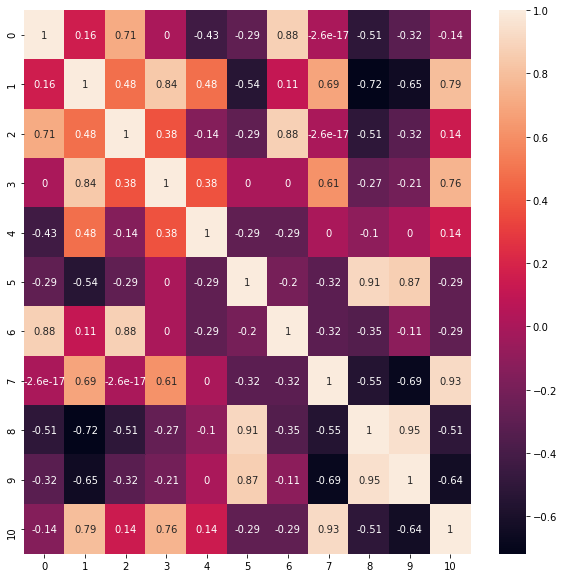

In [83]:
plt.figure(figsize=(10, 10))
sns.heatmap(np.corrcoef(total_table), annot=True)

# Проверял гипотезу что корреляция 10го пользователя с 9м будет так же максимальная
# Так ли это для любых данных?